In [1]:
# Sample from von Mises distribution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ringity as rng
import seaborn as sns

rng.set_theme()

In [2]:
def vonMises_pointcloud(N, kappa, jitter):
    circular_sample = np.random.vonmises(mu=0.0, kappa=kappa, size=N)
    X = np.array([np.cos(circular_sample), np.sin(circular_sample)]) + np.random.normal(
        0, jitter, (2, N)
    )
    return X

## Visual inspection

In [3]:
# Sample from von Mises distribution

# Fixed parameters
N_pts = 2**9
N_samples = 6
jitter = 0.2

# Sweep over kappa
kappas = np.linspace(0, 3, N_samples)

# Generate samples
samples = [vonMises_pointcloud(N_pts, kappa, jitter) for kappa in kappas]

# Calculate persistence diagrams
diagrams = [rng.pdiagram_from_point_cloud(sample.T) for sample in samples]

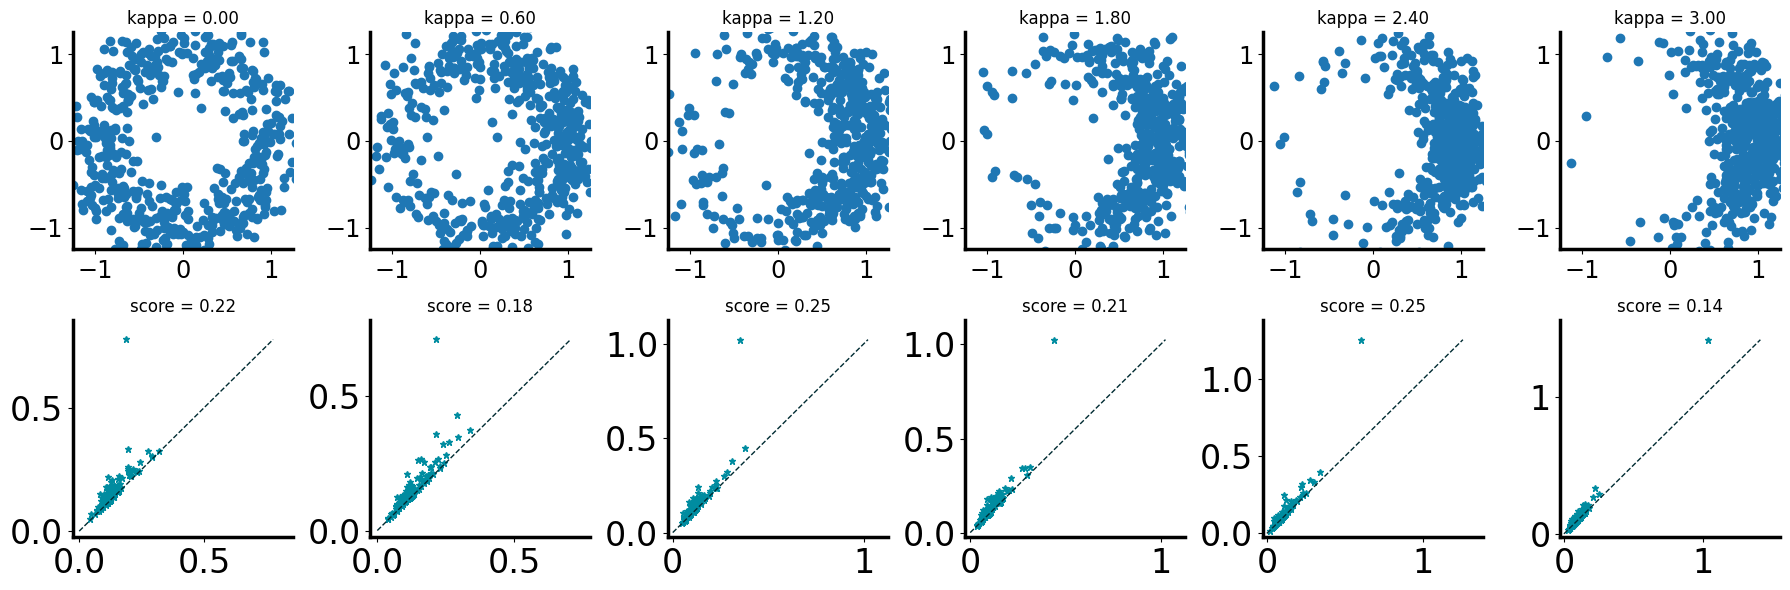

In [4]:
# Plot persistence diagrams

fig, axes = plt.subplots(2, N_samples, figsize=(3 * N_samples, 6))
for i, (diagram, kappa, sample) in enumerate(zip(diagrams, kappas, samples)):
    axes[0, i].set_title(f"kappa = {kappa:.2f}")

    axes[0, i].set_xlim(-1.25, 1.25)
    axes[0, i].set_ylim(-1.25, 1.25)

    x, y = sample
    axes[0, i].scatter(x, y)

    rng.plot_dgm(diagram, ax=axes[1, i])
    score = rng.ring_score_from_pdiagram(diagram, score_type="diameter", exponent=1.01)
    axes[1, i].set_title(f"score = {score:.2f}")

plt.tight_layout()

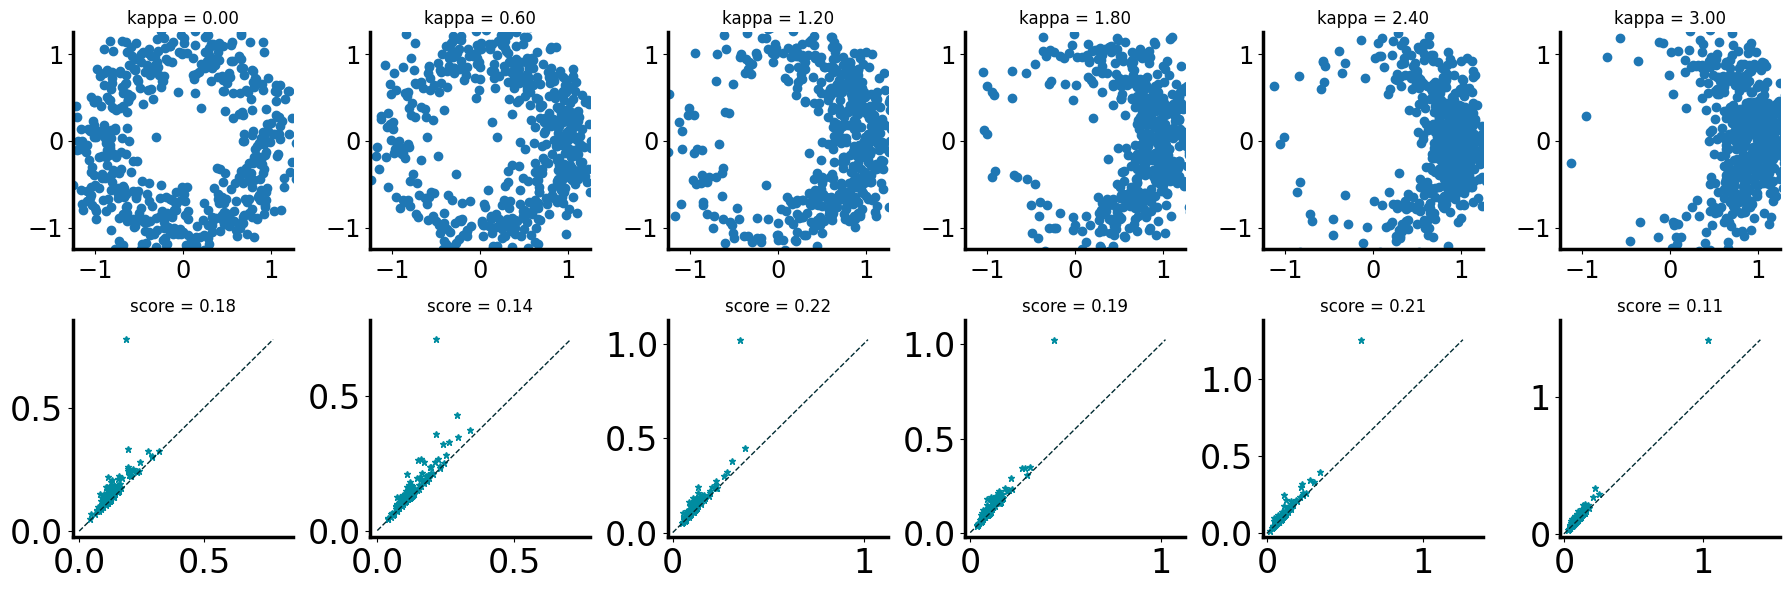

In [5]:
# Plot persistence diagrams

fig, axes = plt.subplots(2, N_samples, figsize=(3 * N_samples, 6))
for i, (diagram, kappa, sample) in enumerate(zip(diagrams, kappas, samples)):
    axes[0, i].set_title(f"kappa = {kappa:.2f}")

    axes[0, i].set_xlim(-1.25, 1.25)
    axes[0, i].set_ylim(-1.25, 1.25)

    x, y = sample
    axes[0, i].scatter(x, y)

    rng.plot_dgm(diagram, ax=axes[1, i])
    score = rng.ring_score_from_pdiagram(diagram, score_type="diameter", exponent=2)
    axes[1, i].set_title(f"score = {score:.2f}")

plt.tight_layout()

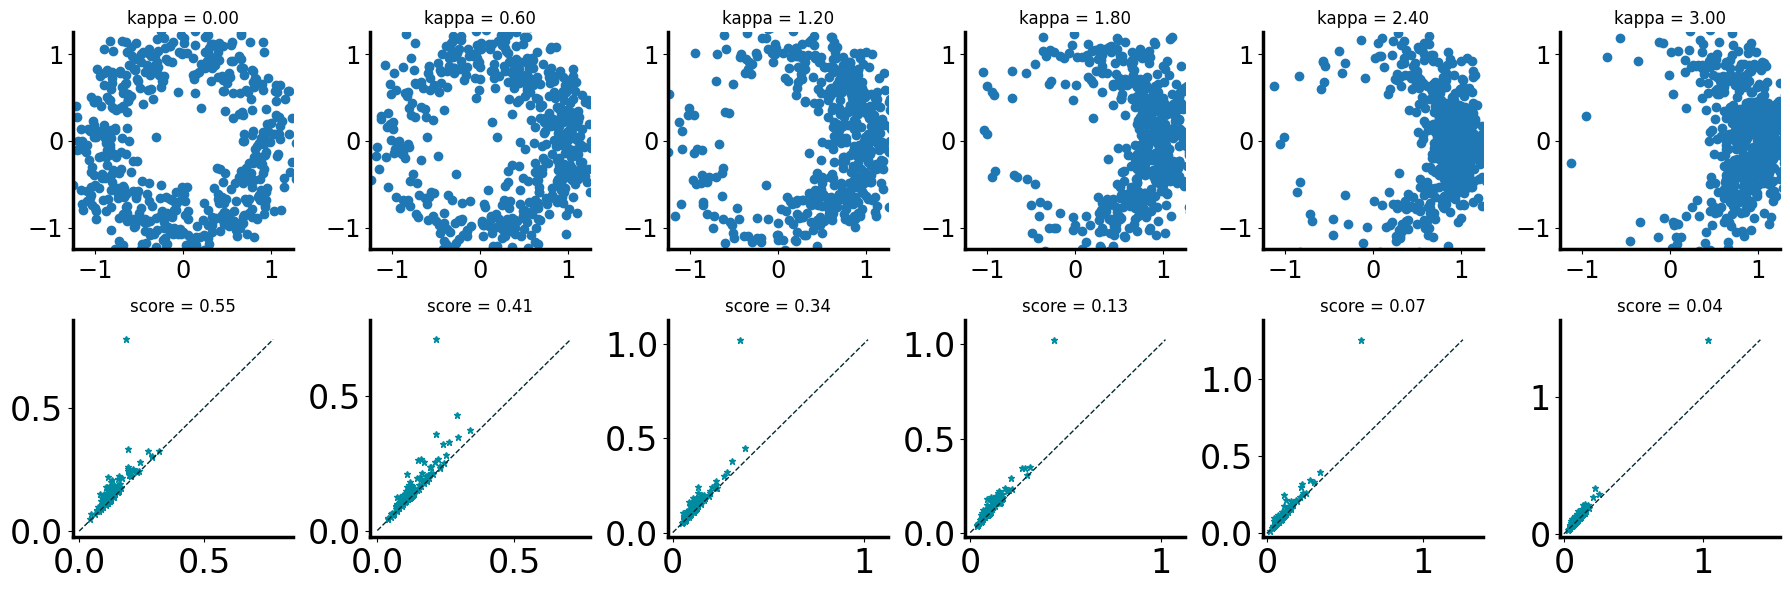

In [6]:
# Plot persistence diagrams

fig, axes = plt.subplots(2, N_samples, figsize=(3 * N_samples, 6))
for i, (diagram, kappa, sample) in enumerate(zip(diagrams, kappas, samples)):
    axes[0, i].set_title(f"kappa = {kappa:.2f}")

    axes[0, i].set_xlim(-1.25, 1.25)
    axes[0, i].set_ylim(-1.25, 1.25)

    x, y = sample
    axes[0, i].scatter(x, y)

    rng.plot_dgm(diagram, ax=axes[1, i])
    score = rng.ring_score_from_pdiagram(diagram, score_type="ratio", exponent=99)
    axes[1, i].set_title(f"score = {score:.2f}")

plt.tight_layout()

## Curves

In [7]:
# Sample from von Mises distribution

# Fixed parameters
N_pts = 2**9
N_samples = 2**5
jitter = 0.2

# Sweep over kappa
kappas = np.linspace(0, 4, N_samples)

# Generate samples
samples = {kappa: [vonMises_pointcloud(N_pts, kappa, jitter) for _ in range(2**10)] for kappa in kappas}

# Calculate persistence diagrams
diagrams = {kappa: [rng.pdiagram_from_point_cloud(sample.T) for sample in samples[kappa]] for kappa in kappas}

<Axes: >

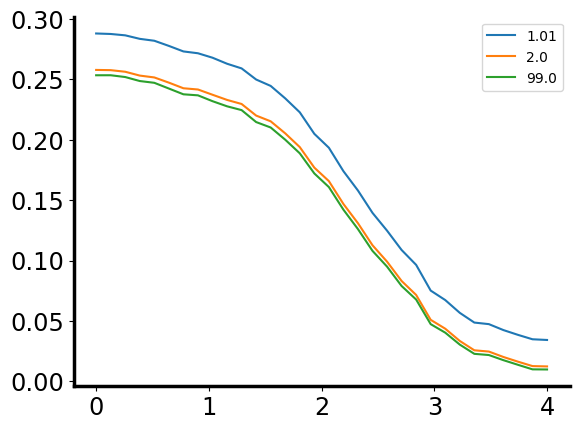

In [8]:
exponents = [1.01, 2, 99]

values = {
    kappa: [
        [
            rng.ring_score_from_pdiagram(diagram, score_type="diameter", exponent=b)
            for b in exponents
        ]
        for diagram in diagrams[kappa]
    ]
    for kappa in kappas
}

# Get dataframe of quartiles for each exponent
means = {kappa: np.mean(values[kappa], axis=0) for kappa in kappas}
stds = {kappa: np.std(values[kappa], axis=0) for kappa in kappas}

diameter_df = pd.DataFrame(means, columns=kappas, index = exponents).T
diameter_df.plot()

<Axes: >

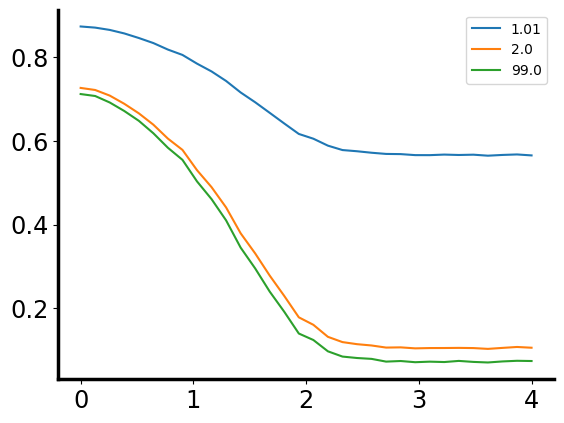

In [9]:
exponents = [1.01, 2, 99]

values = {
    kappa: [
        [
            rng.ring_score_from_pdiagram(diagram, score_type="ratio", exponent=b)
            for b in exponents
        ]
        for diagram in diagrams[kappa]
    ]
    for kappa in kappas
}

# Get dataframe of quartiles for each exponent
means = {kappa: np.mean(values[kappa], axis=0) for kappa in kappas}
stds = {kappa: np.std(values[kappa], axis=0) for kappa in kappas}

ratio_df = pd.DataFrame(means, columns=kappas, index = exponents).T
ratio_df.plot()

In [10]:
diameter_df['type'] = 'diameter'
ratio_df['type'] = 'ratio'

df = pd.concat([diameter_df, ratio_df])
df['kappa'] = df.index

In [11]:
df_plot = (
    df.melt(id_vars=["type", 'kappa'])
    .rename(columns={"variable": "exponent", "value": "score"})
)

<Axes: xlabel='kappa', ylabel='score'>

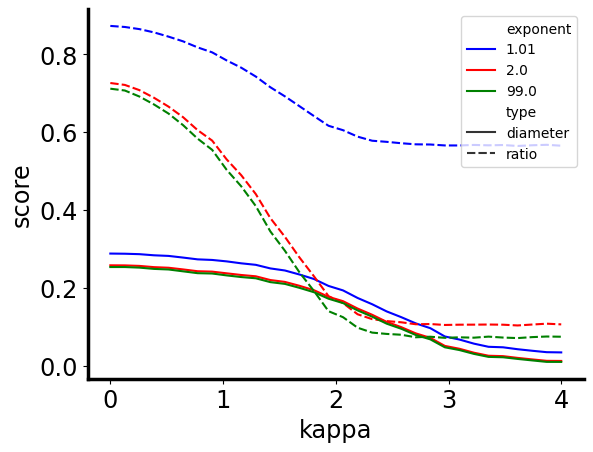

In [12]:
sns.lineplot(data=df_plot, x='kappa', y="score", hue='exponent', style='type', palette=['blue', 'red', 'green'])